# PySpark DataFrame

PySpark dataframes are distributed collections of data that can be run on multiple machines and organize data into named columns. These dataframes can pull from external databases, structured data files or existing resilient distributed datasets (RDDs).

It also shares some common characteristics with RDD:

* Immutable in nature: We can create DataFrame / RDD once but can’t change it. And we can transform a DataFrame / RDD  after applying transformations.

* Lazy Evaluations: Which means that a task is not executed until an action is performed.

* Distributed: RDD and DataFrame both are distributed in nature.


### Import the necessary libraries.

In [ ]:
# Import the findspark library to locate and initialize Spark
import findspark
findspark.init()

# Import necessary components from PySpark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *


In [ ]:
# Create or get a SparkSession
spark = SparkSession.builder.getOrCreate()

# Get the SparkContext (sc) from the SparkSession object (spark)
sc = spark.sparkContext


### Create a DataFrame

A DataFrame in Apache Spark can be created in multiple ways:

* It can be created using different data formats. For example, loading the data from JSON, CSV.

* Loading data from Existing RDD.

* Programmatically specifying schema.


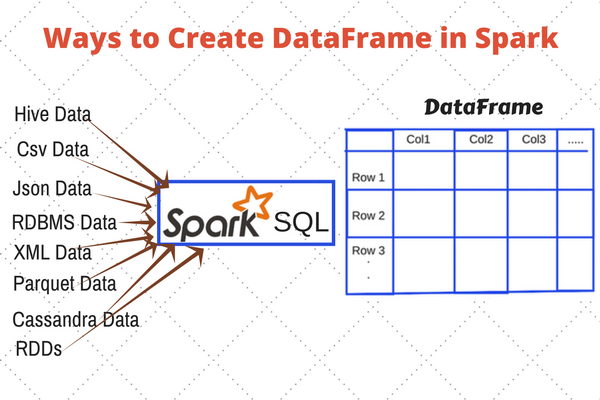

#### Creating DataFrame from a list of tuples

In [ ]:
# Create a DataFrame named 'data_df' from a list of tuples using Spark's 'createDataFrame' method
data_df = spark.createDataFrame([("Brooke", 20), ("Denny", 31), ("Jules", 30),("TD", 35), ("Brooke", 25)], ["name", "age"])

In [ ]:
# Display the contents of the DataFrame 'data_df' using the 'show' method
data_df.show()


+------+---+
|  name|age|
+------+---+
|Brooke| 20|
| Denny| 31|
| Jules| 30|
|    TD| 35|
|Brooke| 25|
+------+---+



#### Creating the DataFrame from Json file

In [ ]:
# read json file
df = spark.read.json("/content/people.json")
# Displays the content of the DataFrame to stdout
df.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [ ]:
# Print the schema of the DataFrame 'df'
#To see the types of columns in DataFrame, we can use the printSchema, dtypes.
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [ ]:
# Dispaly the first five rows in dataframe
df.head(5)

[Row(age=None, name='Michael'),
 Row(age=30, name='Andy'),
 Row(age=19, name='Justin')]

In [ ]:
# We can pass the argument truncate = False to not truncate the result.
# Dispaly the first five rows in dataframe using show mehod
df.show(5)

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



###### show() VS. head() in pyspark

In PySpark, show() and head() are two methods used to display the contents of a DataFrame.

1. show() :

  * dispaly the data in a user-friendly, formatted way, making it suitable for quickly inspecting the data's content and structure.


2. head() :

  * It returns the data as an array of Row objects, making it suitable for programmatic analysis and manipulation.

In [ ]:
# Count the Number of Rows in DataFrame
df.count()

3

In [ ]:
#  Count the Number of Columns Along With Their Names
df.columns

['age', 'name']

In [ ]:
# Get the Summary Statistics in the dataframe
df.describe().show()


+-------+------------------+-------+
|summary|               age|   name|
+-------+------------------+-------+
|  count|                 2|      3|
|   mean|              24.5|   NULL|
| stddev|7.7781745930520225|   NULL|
|    min|                19|   Andy|
|    max|                30|Michael|
+-------+------------------+-------+



#### Select Column(s) From the DataFrame

There are differant  ways to select columns from dataframe

In [ ]:
# Select the 'age' column from the DataFrame 'df' and display it using the 'show' method
df.select('age').show()


+----+
| age|
+----+
|NULL|
|  30|
|  19|
+----+



In [ ]:
col('name')

Column<'name'>

The col function in PySpark is used to select a column from a DataFrame. It returns a Column object. The Column object represents a column in a DataFrame and can be used to perform operations on that column.

When you see Column<'name'>, it means that the col function has returned a Column object that represents the ‘name’ column in the DataFrame. You can then use this Column object to perform operations on the ‘name’ column.

In [ ]:
## Selects the 'name' column from the DataFrame
df.select(col('name')).show()


+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+



In [ ]:
#Select the 'name' column and calculate the square of the 'age' column using the 'col' function,
df.select('name', col('age')**2).show()

+-------+-------------+
|   name|POWER(age, 2)|
+-------+-------------+
|Michael|         NULL|
|   Andy|        900.0|
| Justin|        361.0|
+-------+-------------+



In [ ]:
# Find the Number of Distinct names in the df
df.distinct().count()

3

In [ ]:
# Select everybody, but increment the age by 1
df.select(df['name'], df['age'] + 1).show()

+-------+---------+
|   name|(age + 1)|
+-------+---------+
|Michael|     NULL|
|   Andy|       31|
| Justin|       20|
+-------+---------+



The `filter` function in PySpark is used to filter rows from a DataFrame based on a specified condition.

In [ ]:
#Filter the DataFrame 'df' to retain rows where the 'age' column is greater than 21,
df.filter(df['age'] > 21).show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



#### Grouping Data

PySpark DataFrame also provides a way of handling grouped data by using the common approach, split-apply-combine strategy.
It groups the data by a certain condition applies a function to each group and then combines them back to the DataFrame.

In [ ]:
# Create a DataFrame 'df' from a list of lists, with a specified schema
# Each inner list represents a row with values for columns 'color', 'fruit', 'v1', and 'v2'
df = spark.createDataFrame([
    ['red', 'banana', 1, 10], ['blue', 'banana', 2, 20], ['red', 'carrot', 3, 30],
    ['blue', 'grape', 4, 40], ['red', 'carrot', 5, 50], ['black', 'carrot', 6, 60],
    ['red', 'banana', 7, 70], ['red', 'grape', 8, 80]], schema=['color', 'fruit', 'v1', 'v2'])

# Display the contents of the DataFrame 'df' using the 'show' method
df.show()


+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



In [ ]:
# Group the DataFrame 'df' by the 'color' column and calculate the average for each group
# Then, display the result using the 'show' method
df.groupby('color').avg().show()

+-----+-------+-------+
|color|avg(v1)|avg(v2)|
+-----+-------+-------+
|  red|    4.8|   48.0|
| blue|    3.0|   30.0|
|black|    6.0|   60.0|
+-----+-------+-------+



In PySpark, the `agg` (short for "aggregate") function is used to perform various aggregation operations on a DataFrame. It allows you to compute aggregate values for one or more columns. The `agg` function is often used in combination with aggregation functions like `avg`, `sum`, `max`, `min`, and user-defined functions.

In [ ]:
# Group the DataFrame 'df' by multiple columns 'color' and 'fruit'
# Calculate the average of the 'v1' column for each group and rename it as 'v1_avg'
# Display the result using the 'show' method
df.groupby(['color', 'fruit']).agg(avg('v1').alias('v1_avg')).show()

+-----+------+------+
|color| fruit|v1_avg|
+-----+------+------+
| blue| grape|   4.0|
|  red|banana|   4.0|
|  red|carrot|   4.0|
| blue|banana|   2.0|
|black|carrot|   6.0|
|  red| grape|   8.0|
+-----+------+------+



### Schemas and Creating DataFrames

A schema in Spark defines the column names and associated data types for a DataFrame. Most often, schemas come into play when you are reading structured data
from an external data source Defining a schema
up front as opposed to taking a schema-on-read approach offers three benefits:
<b>
1. You relieve Spark from the onus of inferring data types.
2. You prevent Spark from creating a separate job just to read a large portion of your file to ascertain the schema, which for a large data file can be expensive and time-consuming.
3. You can detect errors early if data doesn’t match the schema.
</b>

<i>So, it is encouraged to always define your schema up front whenever you want to
read a large file from a data source.</i>

There is are two ways to define a schema :

Spark allows you to define a schema in two ways. One is to

1.  define it programmatically.

2. employ a Data Definition Language (DDL) string, which is much simpler and easier to read.




To define a schema programmatically for a DataFrame with three named columns, author, title, and pages, you can use the Spark DataFrame API. For example:

In [ ]:
# Import necessary classes from the 'pyspark.sql.types' module
from pyspark.sql.types import *

# Define a custom schema using 'StructType' to specify the structure of the DataFrame
schema = StructType([
    StructField("author", StringType(), False),  # Define the 'author' column with StringType
    StructField("title", StringType(), False),   # Define the 'title' column with StringType
    StructField("pages", IntegerType(), False)  # Define the 'pages' column with IntegerType
])


Defining the same schema using DDL is much simpler:

In [ ]:
# Define schema for our data using DDL
# we are using back quote (`Id`) to define column name
schema = "`Id` INT, `First` STRING, `Last` STRING, `Url` STRING,`Published` STRING, `Hits` INT, `Campaigns` ARRAY<STRING>"

In [ ]:
data = [[1, "Jules", "Damji", "https://tinyurl.1", "1/4/2016", 4535, ["twitter","LinkedIn"]],
[2, "Brooke","Wenig", "https://tinyurl.2", "5/5/2018", 8908, ["twitter","LinkedIn"]],
[3, "Denny", "Lee", "https://tinyurl.3", "6/7/2019", 7659, ["web","twitter", "FB", "LinkedIn"]],
[4, "Tathagata", "Das", "https://tinyurl.4", "5/12/2018", 10568,["twitter", "FB"]],
[5, "Matei","Zaharia", "https://tinyurl.5", "5/14/2014", 40578, ["web","twitter", "FB", "LinkedIn"]],
[6, "Reynold", "Xin", "https://tinyurl.6", "3/2/2015", 25568,["twitter", "LinkedIn"]]]

In [ ]:
# Create a DataFrame using the schema defined above
df_blog = spark.createDataFrame(data,schema=schema)

In [ ]:
# Show the DataFrame; it should reflect our table above
df_blog.show()

+---+---------+-------+-----------------+---------+-----+--------------------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|
+---+---------+-------+-----------------+---------+-----+--------------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|
+---+---------+-------+-----------------+---------+-----+--------------------+



In [ ]:
# Print the schema used by Spark to process the DataFrame
df_blog.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- First: string (nullable = true)
 |-- Last: string (nullable = true)
 |-- Url: string (nullable = true)
 |-- Published: string (nullable = true)
 |-- Hits: integer (nullable = true)
 |-- Campaigns: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [ ]:
# Create a DataFrame without using the schema
blogs_df_2 = spark.createDataFrame(data)
# Show the DataFrame; it should reflect our table above
blogs_df_2.show()


+---+---------+-------+-----------------+---------+-----+--------------------+
| _1|       _2|     _3|               _4|       _5|   _6|                  _7|
+---+---------+-------+-----------------+---------+-----+--------------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|
+---+---------+-------+-----------------+---------+-----+--------------------+



In [ ]:
# Print the schema used by Spark to process the DataFrame
blogs_df_2.printSchema()

root
 |-- _1: long (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)
 |-- _4: string (nullable = true)
 |-- _5: string (nullable = true)
 |-- _6: long (nullable = true)
 |-- _7: array (nullable = true)
 |    |-- element: string (containsNull = true)



The difference between dataframe with e with a schema and one without a schema. lies in the column names and data types:

* DataFrame with Schema:

The column names are explicitly defined and meaningful (e.g., "Id," "First," "Last").
The data types for each column are specified, which allows for better type checking and optimization.
DataFrame without Schema:

* The column names are auto-generated as "_1," "_2," "_3," and so on.
The data types are not explicitly defined, resulting in all columns being treated as strings by default.

Using a DataFrame with a schema is generally recommended because it provides better clarity, type safety, and optimization opportunities. When you have a schema, Spark can perform optimizations like predicate pushdown and type inference, which can lead to improved performance.

In [ ]:
# We can get the schema definition and use it anywhere
df_blog.schema

StructType([StructField('Id', IntegerType(), True), StructField('First', StringType(), True), StructField('Last', StringType(), True), StructField('Url', StringType(), True), StructField('Published', StringType(), True), StructField('Hits', IntegerType(), True), StructField('Campaigns', ArrayType(StringType(), True), True)])


In PySpark, the `expr` function is used to define complex expressions that can be applied to DataFrame columns.

In [ ]:
# Select and compute a new column by multiplying the 'Hits' column by 2 using the 'expr' function
# Then, display the result using the 'show' method
df_blog.select(expr("Hits * 2")).show()

+----------+
|(Hits * 2)|
+----------+
|      9070|
|     17816|
|     15318|
|     21136|
|     81156|
|     51136|
+----------+



In PySpark, the `alias` function is used to rename a column in a DataFrame. It allows you to give a more meaningful or concise name to a column, making the DataFrame's columns more interpretable and user-friendly.

In [ ]:
# Select and compute a new column by multiplying the 'Hits' column by 2 using the 'expr' function
# Rename the newly computed column as 'Squared hits' using the 'alias' function
# Finally, display the result using the 'show' method
df_blog.select(expr("Hits * 2").alias("Squared hits")).show()


+------------+
|Squared hits|
+------------+
|        9070|
|       17816|
|       15318|
|       21136|
|       81156|
|       51136|
+------------+



In PySpark, the `withColumn` function is used to add, replace, or update columns in a DataFrame. It allows you to apply a transformation or expression to an existing DataFrame and create a new DataFrame with the modified or added columns.

In [ ]:
# Create a new column 'Big Hitters' in the DataFrame 'df_blog' using the 'withColumn' method
# The new column contains Boolean values indicating whether the 'Hits' column is greater than 10,000
# Then, display the DataFrame with the new column using the 'show' method
df_blog.withColumn("Big Hitters", col('Hits') > 10000).show()


+---+---------+-------+-----------------+---------+-----+--------------------+-----------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|Big Hitters|
+---+---------+-------+-----------------+---------+-----+--------------------+-----------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|      false|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|      false|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|      false|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|       true|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|       true|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|       true|
+---+---------+-------+-----------------+---------+-----+--------------------+-----------+



In PySpark, the `concat` function is used to concatenate multiple string columns or literals together to create a new string column.

In [ ]:
# Create a new column 'Full Name' in the DataFrame 'df_blog' using the 'withColumn' method
# The new column is computed by concatenating the 'First' and 'Last' columns using the 'concat' function
# Display the DataFrame with the newly added 'Full Name' column using the 'show' method
df_blog.withColumn("Full Name", concat(col('First'), col('Last'))).show()


+---+---------+-------+-----------------+---------+-----+--------------------+------------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|   Full Name|
+---+---------+-------+-----------------+---------+-----+--------------------+------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|  JulesDamji|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]| BrookeWenig|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|    DennyLee|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|TathagataDas|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|MateiZaharia|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|  ReynoldXin|
+---+---------+-------+-----------------+---------+-----+--------------------+------------+



In [ ]:
# Create a new column 'Full Name' in the DataFrame 'df_blog' using the 'withColumn' method
# The new column is computed by concatenating the 'First' and 'Last' columns with a space separator
# The 'concat_ws' function is used for concatenation with a specified separator
# Display the DataFrame with the newly added 'Full Name' column using the 'show' method
df_blog.withColumn("Full Name", concat_ws(" ", col('First'), col('Last'))).show()


+---+---------+-------+-----------------+---------+-----+--------------------+-------------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|    Full Name|
+---+---------+-------+-----------------+---------+-----+--------------------+-------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|  Jules Damji|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]| Brooke Wenig|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|    Denny Lee|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|Tathagata Das|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|Matei Zaharia|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|  Reynold Xin|
+---+---------+-------+-----------------+---------+-----+--------------------+-------------+



In PySpark, you can use the `sort()` function to sort the DataFrame based on one or more columns.

In [ ]:
# Sort the DataFrame 'blogs_df' based on the 'Id' column in descending order (highest to lowest)
# The 'sort' function is used with the 'col' function to specify the sorting column and the 'ascending' parameter as False
# Display the sorted DataFrame using the 'show' method
df_blog.sort(col('Id'), ascending=False).show()


+---+---------+-------+-----------------+---------+-----+--------------------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|
+---+---------+-------+-----------------+---------+-----+--------------------+
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|
+---+---------+-------+-----------------+---------+-----+--------------------+



#### Dealing with missing data with pyspark

1. Keep them.
2. Remove them.
3. Fill them with some values.

In [ ]:
# Read data from a CSV file 'NullData.csv' into a DataFrame 'df_null'
# The 'header' parameter is set to 'True' to treat the first row as column headers
# The 'inferSchema' parameter is set to 'True' to infer column data types automatically
df_null = spark.read.csv('NullData.csv', header=True, inferSchema=True)


In [ ]:
df_null.show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp2| NULL| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [ ]:
# drop nulls
df_null.na.drop().show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
+----+-----+-----+



In [ ]:
# Remove rows from DataFrame 'df_null' with at least 2 non-null values
# Display the resulting DataFrame after dropping rows with missing values
df_null.na.drop(thresh=2).show()


+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [ ]:
#drop null values from a specific column
df_null.na.drop(subset=['Sales']).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [ ]:
# Fill the string type missing values in DataFrame 'df_null' with the specified value 'Fill Value'
# Display the resulting DataFrame with missing values replaced
df_null.na.fill('Fill Value').show()


+----+----------+-----+
|  Id|      Name|Sales|
+----+----------+-----+
|emp1|      John| NULL|
|emp2|Fill Value| NULL|
|emp3|Fill Value|345.0|
|emp4|     Cindy|456.0|
+----+----------+-----+



In [ ]:
# Fill all numerical missing values in DataFrame 'df' with 0
df_null.na.fill(0).show()




+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John|  0.0|
|emp2| NULL|  0.0|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [ ]:
# Fill missing values in the 'Name' column of DataFrame 'df' with 'No Name'
df_null.na.fill('No Name', subset=['Name']).show()

+----+-------+-----+
|  Id|   Name|Sales|
+----+-------+-----+
|emp1|   John| NULL|
|emp2|No Name| NULL|
|emp3|No Name|345.0|
|emp4|  Cindy|456.0|
+----+-------+-----+



In [ ]:
# Calculate the mean value of the 'Sales' column in DataFrame 'df' and collect the result
mean_val = df_null.select(mean(df_null['Sales'])).collect()

mean_val


[Row(avg(Sales)=400.5)]

In [ ]:
# Extract the mean sales value from the result
mean_sales = mean_val[0][0]
mean_sales


400.5

In [ ]:
# Fill missing values in the 'Sales' column of DataFrame 'df' with the calculated mean sales value
df_null.na.fill(mean_sales, subset=['Sales']).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John|400.5|
|emp2| NULL|400.5|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+

